# Reducing Churn in Telecom: A Data-Driven Approach

**Problem Statement:**

In the highly competitive telecommunications industry, customer churn remains a significant challenge for service providers. Churn, defined as the rate at which customers discontinue their services, not only results in revenue loss but also imposes additional costs associated with acquiring new customers to replace those who leave.



**Objectives:**

The primary objective of this project is to leverage data analytics and machine learning to address the issue of customer churn in the telecom industry, using the dataset obtained from [Kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data). Specifically, our goals are as follows:

1. Develop a predictive model: Build a machine learning model capable of predicting which customers are likely to churn in the near future.

2. Improve customer retention: Implement targeted retention strategies based on the model's predictions to reduce churn rates and increase customer loyalty.

3. Optimize resources: By accurately identifying customers at risk of churn, we aim to optimize resource allocation and reduce customer acquisition costs.


By achieving these objectives, telecom company aims to enhance customer satisfaction, increase revenue stability, and strengthen its competitive position in the market.

In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns


In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


The attributes have the following meaning:
    

- **CustomerID:** Unique identifier for each customer.
- **Gender:** Indicates whether the customer is male or female.
- **SeniorCitizen:** Indicates whether the customer is a senior citizen (1 for yes, 0 for no).
- **Partner:** Indicates whether the customer has a partner (Yes or No).
- **Dependents:** Indicates whether the customer has dependents (Yes or No).
- **Tenure:** The number of months the customer has been with the company.
- **PhoneService:** Indicates whether the customer has a phone service (Yes or No).
- **MultipleLines:** Indicates whether the customer has multiple phone lines (Yes, No, or No phone service).
- **InternetService:** Specifies the customer's internet service provider (DSL, Fiber optic, or No).
- **OnlineSecurity:** Indicates whether the customer has online security (Yes, No, or No internet service).
- **OnlineBackup:** Indicates whether the customer has online backup (Yes, No, or No internet service).
- **DeviceProtection:** Indicates whether the customer has device protection (Yes, No, or No internet service).
- **TechSupport:** Indicates whether the customer has tech support (Yes, No, or No internet service).
- **StreamingTV:** Indicates whether the customer has streaming TV (Yes, No, or No internet service).
- **StreamingMovies:** Indicates whether the customer has streaming movies (Yes, No, or No internet service).
- **Contract:** Specifies the contract term of the customer (Month-to-month, One year, Two years).
- **PaperlessBilling:** Indicates whether the customer has paperless billing (Yes or No).
- **PaymentMethod:** Specifies the customer's payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).
- **MonthlyCharges:** The monthly amount charged to the customer.
- **TotalCharges:** The total amount charged to the customer.
- **Churn:** Indicates whether the customer has churned (left the service) or not (Yes or No).

In [3]:
data.shape

(7043, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- The dataset has too many features with text data and are probably categorical features!
- **Total Charges** is a feature with numerical values but are stored in string datatype. First, we will convert this column into float.

In [6]:
data['TotalCharges'] = data.TotalCharges.astype(float)

ValueError: could not convert string to float: ' '

In [7]:
data[data['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


To convert **TotalCharges**, we noticed that this attribute actually contained string data, which turned out to be an empty string. So we could put zeros where there are empty strings, but I don't see why we should put zeros when **MonthlyCharges** has values greater than zero. So the best thing to do would be to delete these instances and convert TotalCharges back to a numeric value.

In [8]:
df = data[data['TotalCharges']!=' ']

In [9]:
df['TotalCharges'] = df.TotalCharges.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


# 1. Exploratory Data Analysis

### Examination of the target column

In [10]:
df.Churn.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

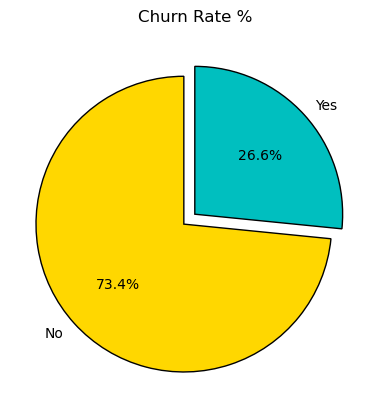

In [11]:
l = list(df['Churn'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
colors = ['gold','c']

plt.pie(circle,labels = ['No','Yes'],autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Churn Rate %');

In our data, 73% of the customers do not churn. Clearly the data is skewed as we would expect a large majority of the customers to not churn. This is important to keep in mind for our modelling as skeweness could lead to a lot of false negatives.

### histograms of continuous variables 

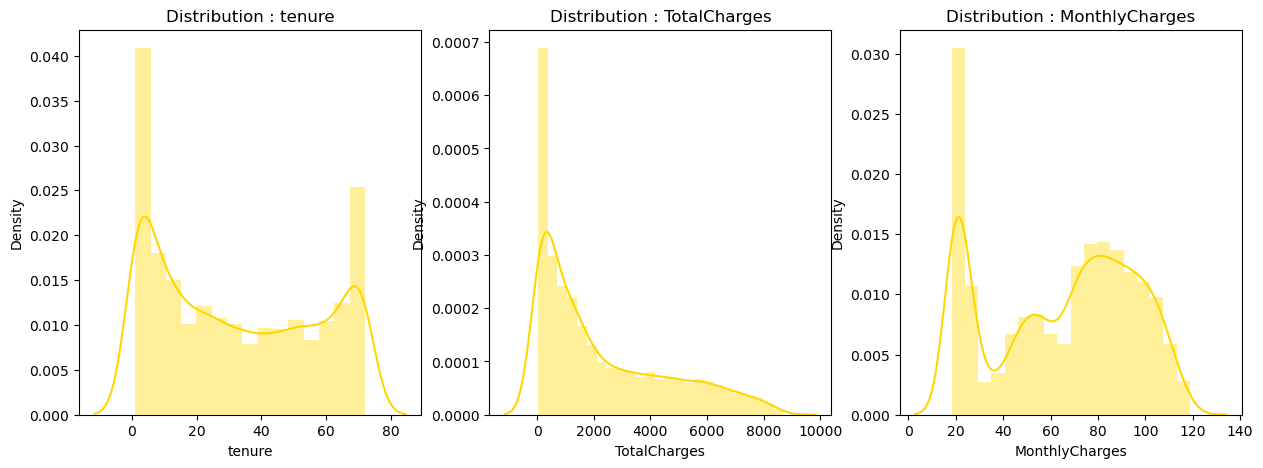

In [12]:
fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
numerical_features = ['tenure', 'TotalCharges', 'MonthlyCharges']
for i in range(len(numerical_features)):
    plt.subplot(1,3,i+1)
    sns.distplot(df[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

### Qualitative variables

In [13]:
for col in df.select_dtypes('object'):
    print(f'{col :-<30} {df[col].unique()}')

customerID-------------------- ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender------------------------ ['Female' 'Male']
Partner----------------------- ['Yes' 'No']
Dependents-------------------- ['No' 'Yes']
PhoneService------------------ ['No' 'Yes']
MultipleLines----------------- ['No phone service' 'No' 'Yes']
InternetService--------------- ['DSL' 'Fiber optic' 'No']
OnlineSecurity---------------- ['No' 'Yes' 'No internet service']
OnlineBackup------------------ ['Yes' 'No' 'No internet service']
DeviceProtection-------------- ['No' 'Yes' 'No internet service']
TechSupport------------------- ['No' 'Yes' 'No internet service']
StreamingTV------------------- ['No' 'Yes' 'No internet service']
StreamingMovies--------------- ['No' 'Yes' 'No internet service']
Contract---------------------- ['Month-to-month' 'One year' 'Two year']
PaperlessBilling-------------- ['Yes' 'No']
PaymentMethod----------------- ['Electronic check' 'Mailed check' 'Ban

The **customerID** column is merely a unique identifier for each customer and does not contain any meaningful information relevant to your analysis, it can be safely removed. 

In [14]:
data_clean = df.drop('customerID', axis=1)

## Looking for Relationships

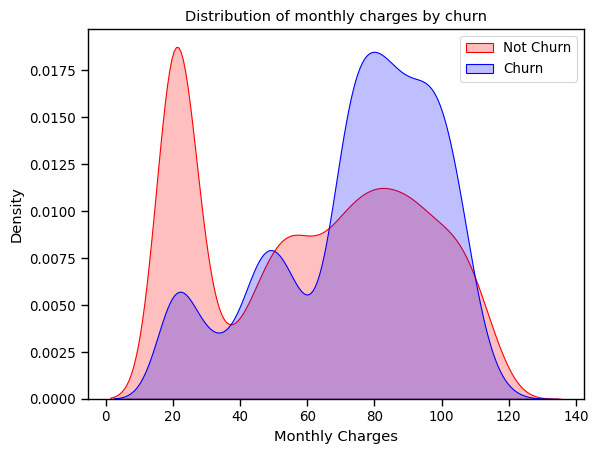

In [15]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(data_clean.MonthlyCharges[(data_clean["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(data_clean.MonthlyCharges[(data_clean["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

- Clients with higher MonthlyCharges are  more likely to churn.

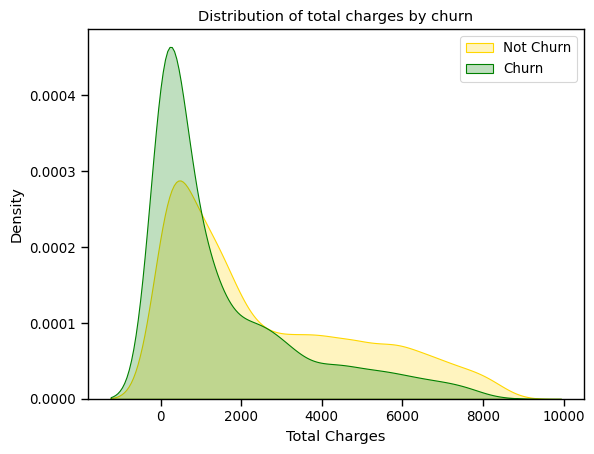

In [16]:
ax = sns.kdeplot(data_clean.TotalCharges[(data_clean["Churn"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(data_clean.TotalCharges[(data_clean["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

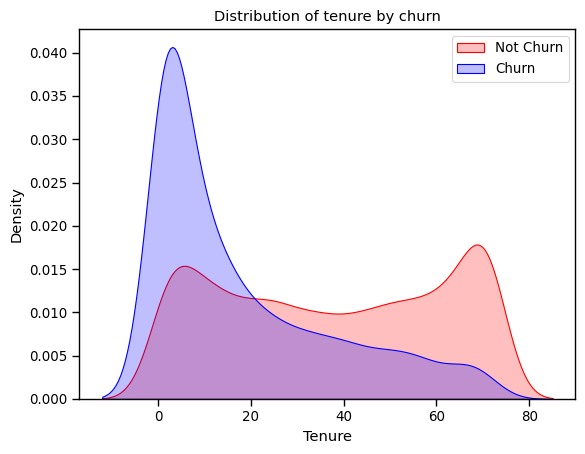

In [17]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(data_clean.tenure[(data_clean["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(data_clean.tenure[(data_clean["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Tenure');
ax.set_title('Distribution of tenure by churn');



   - New customers are more likely to churn



In [18]:
custom_info = ['gender','SeniorCitizen','Partner','Dependents'] # Customer Information
services = ['PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies',
      'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'] # Services Signed Up for!
payments = ['Contract','PaperlessBilling','PaymentMethod'] # Payment Information

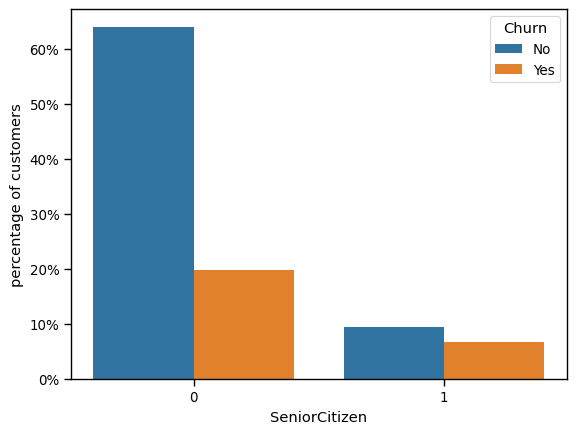

In [19]:
def barplot_percentages(feature, data=df, orient='v', axis_name="percentage of customers"):
    ratios = pd.DataFrame()
    g = df.groupby(feature)["Churn"].value_counts().to_frame()
    g = g.rename({"Churn": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(df)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
barplot_percentages("SeniorCitizen", data=data_clean)

- It can be observed that the fraction of senior citizen is very less.
- Most of the senior citizens churn.

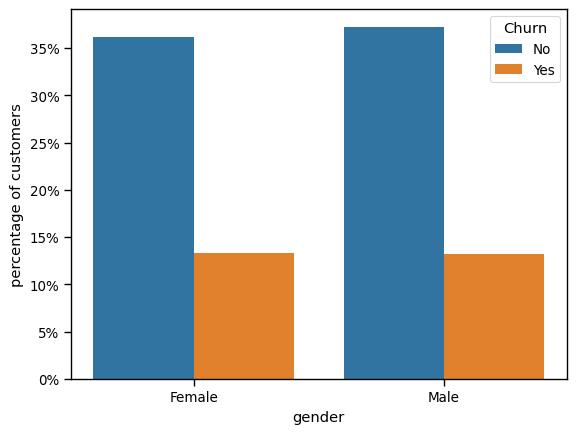

In [20]:
barplot_percentages("gender", data=data_clean)

- Customer churning for male & female customers is very similar to each other!

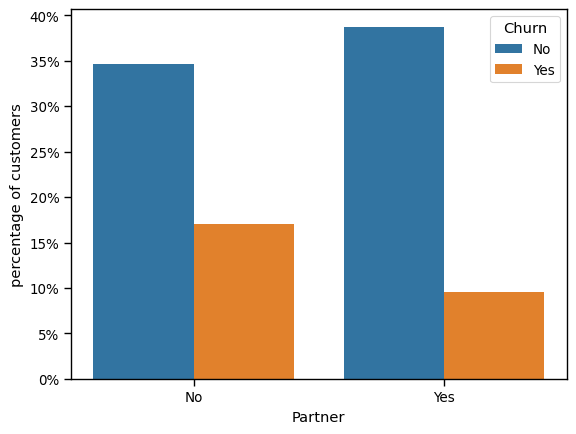

In [21]:
barplot_percentages("Partner", data=data_clean)

- Customers that doesn't have partners are more likely to churn


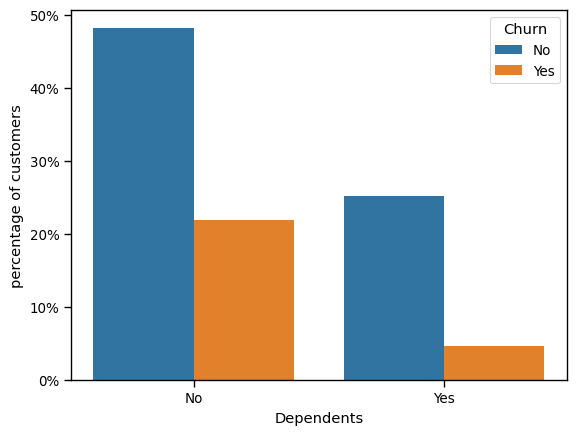

In [22]:
barplot_percentages("Dependents", data=data_clean)

- Churning is high for the customers that don't have Dependents with them!

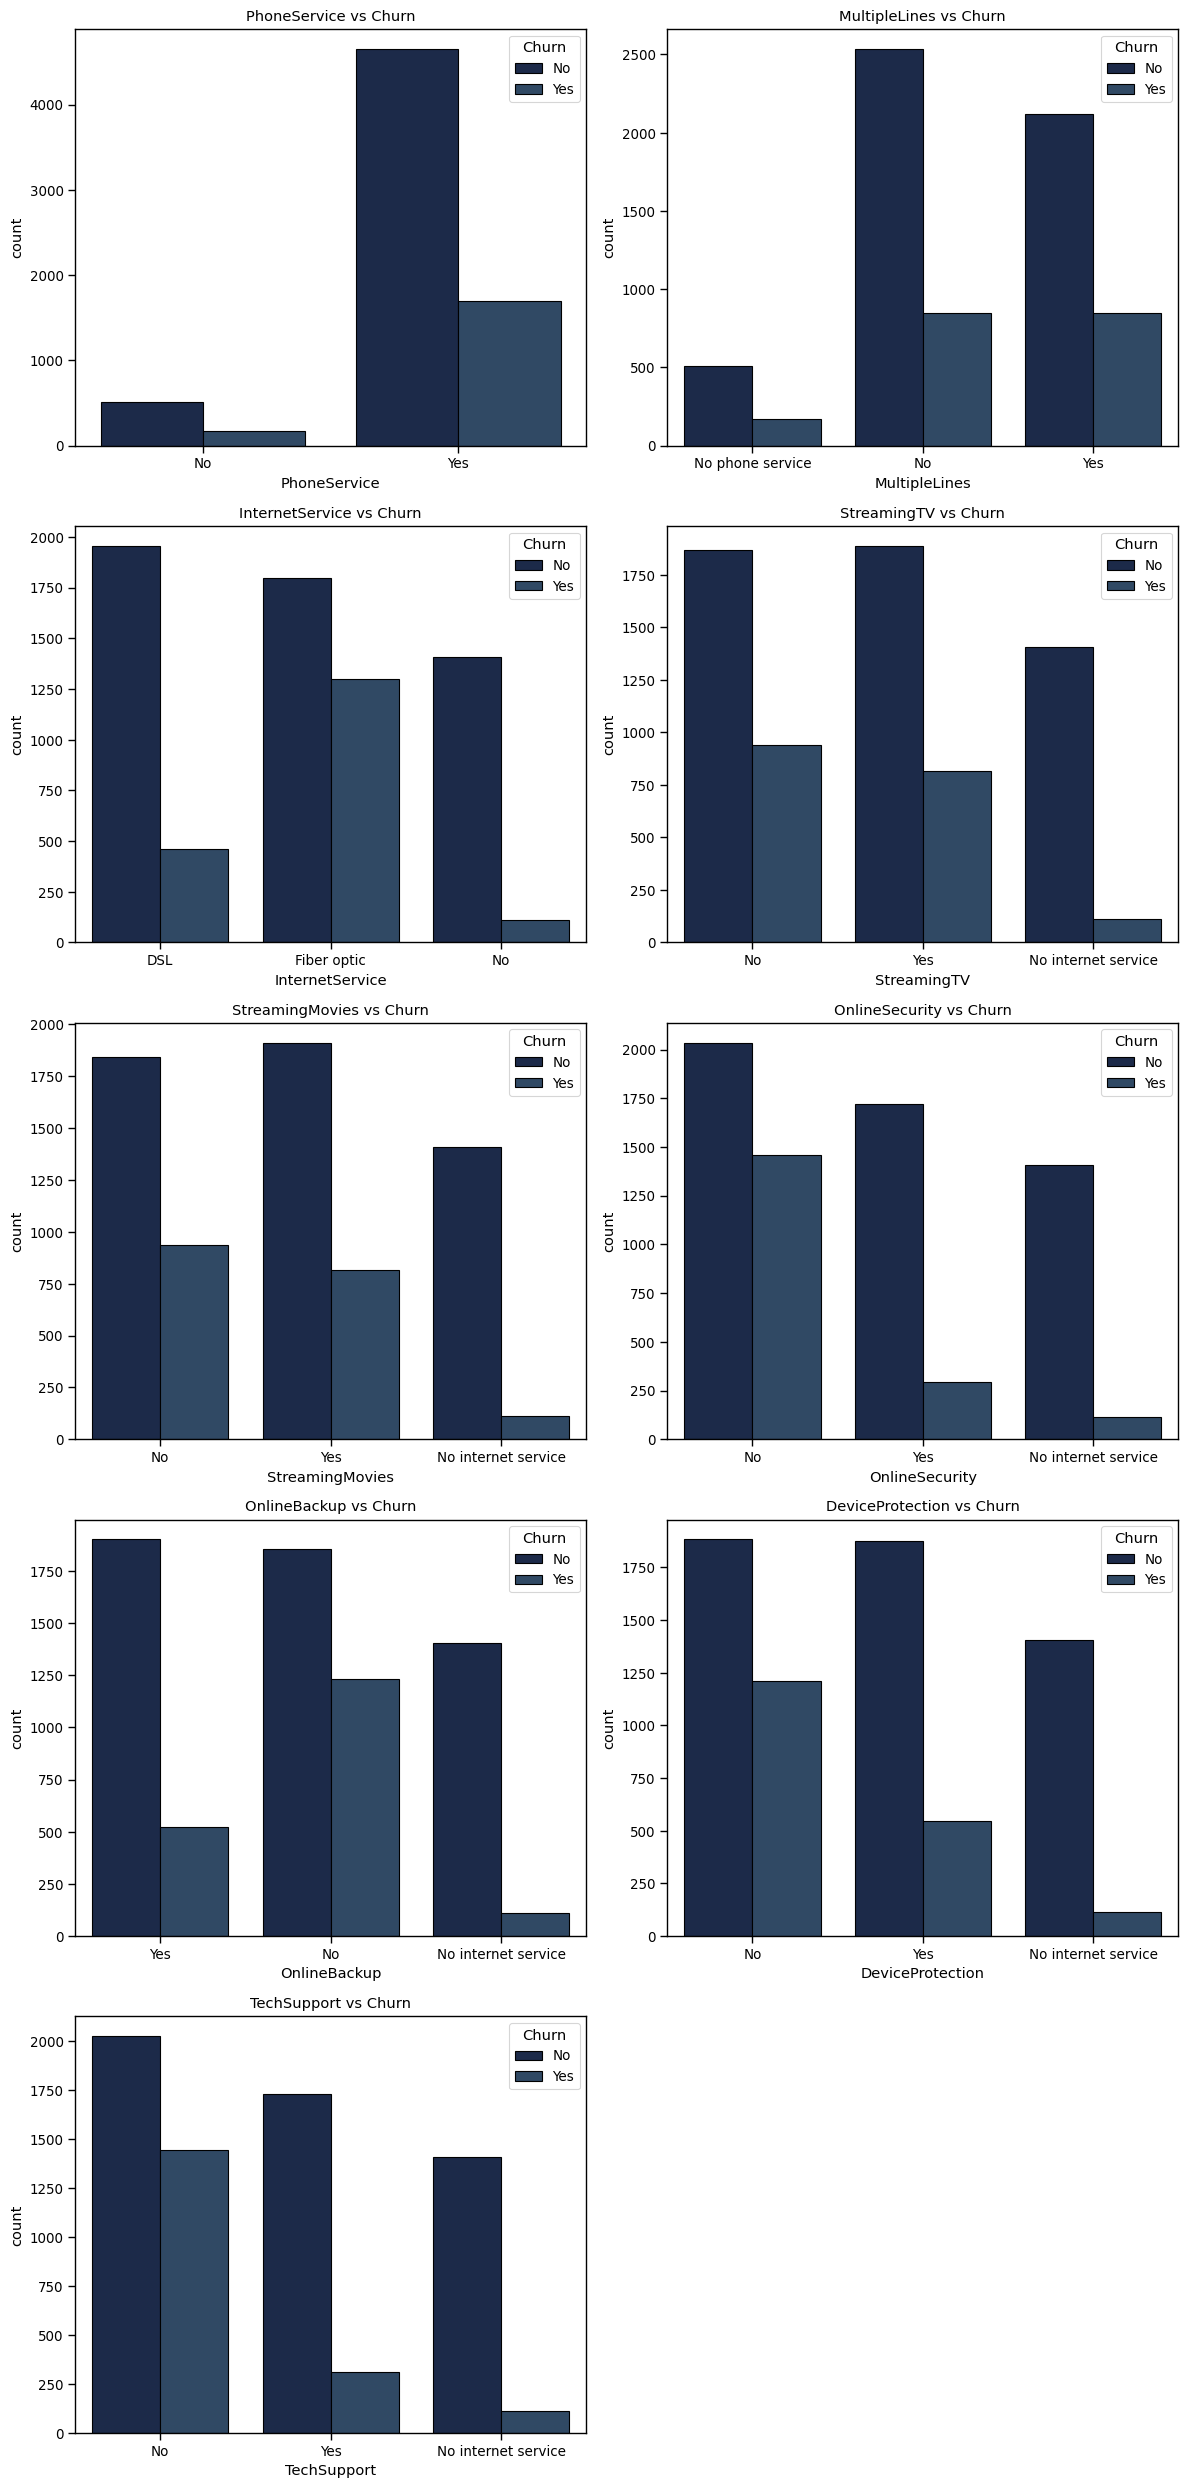

In [23]:
custom_palette = ['#142850', '#27496D', '#0C7B93', '#00A8CC', '#00CED1', '#72EFDD', '#A9F0D1', '#CAF270', '#FFD700']

num_rows = (len(services) + 1) // 2  # Two figures per row
num_cols = 2

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 5 * num_rows))

axes = axes.flatten()

for i, service in enumerate(services):
    ax = sns.countplot(x=service, data=data_clean, hue="Churn", palette=custom_palette, edgecolor='black', ax=axes[i])
    ax.set_title(f'{service} vs Churn')

for i in range(len(services), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

- For **PhoneService**, despite having no phone service, more customers were retained as compared to the number of customers who dropped the services.
- In case of **MultipleLines**, churn rate in when the Multiplelines are present or not is the same.
- A high number of customers have displayed their resistance towards the use of **Fiber optic** cables for providing the **InternetService**. On the contrary, from the above graph, customers prefer using **DSL** for their InternetService!
- **StreamingTV** and **StreamingMovies** display an identical graph. Irrespective of being subscribed to StreamingTV & StreamingMovies, a lot of customers have been churned. Looks like the streaming content was not entirely at fault!
- When it comes down to catering the customers, services w.r.t **OnlineSecurity**, **OnlineBackup**, **DeviceProtection** & **TechSupport** are crucial from the above visualizations!
- A high number of customers have switched their service provider when it comes down poor services with the above mentioned features.

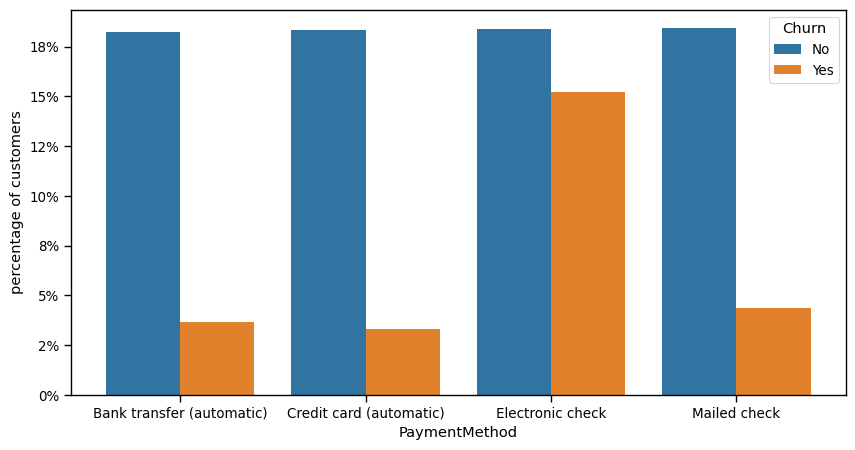

In [24]:
plt.figure(figsize=(10, 5))
barplot_percentages("PaymentMethod", data=data_clean)

In [25]:
data_clean.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

- The preferred payment method is Electronic check. This method also has a very high churn rate

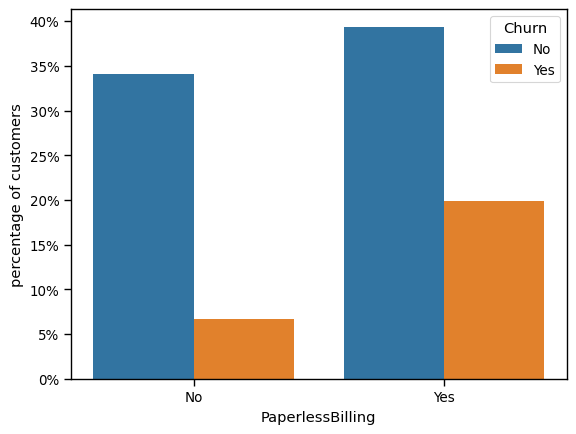

In [26]:
barplot_percentages("PaperlessBilling", data=data_clean)

- PaperlessBilling does not seemed to be appreciated by the customers!

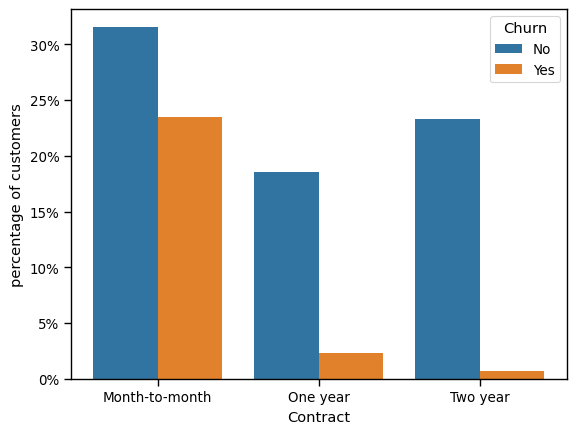

In [27]:
barplot_percentages("Contract", data=data_clean)

- Short term contracts have higher churn rates

## Correlations between Features and Target  & Preprocessing

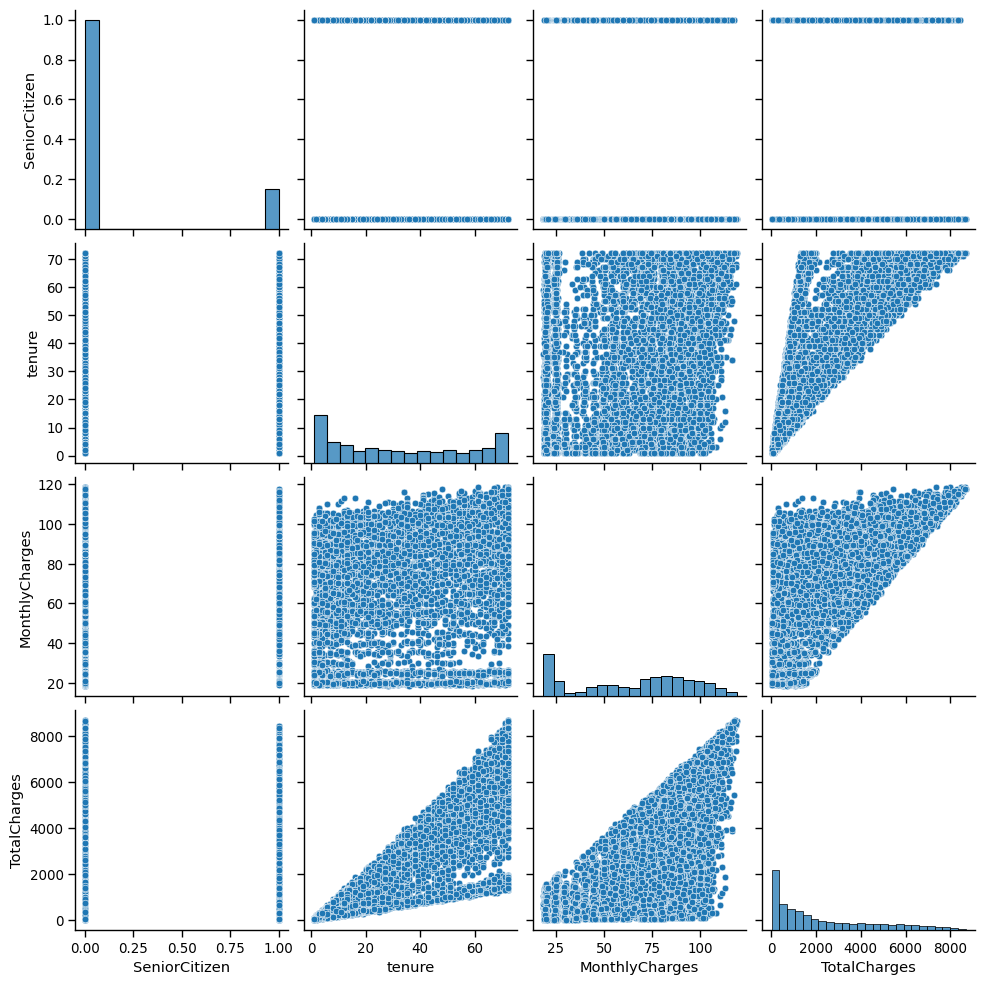

In [28]:
sns.pairplot(data_clean)

In [29]:
data_clean1 = data_clean.copy()

In [30]:
data_clean1 = pd.get_dummies(data_clean1, drop_first=True)

In [31]:
data_clean1

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0
7039,0,72,103.20,7362.90,0,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,0,0
7040,0,11,29.60,346.45,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
7041,1,4,74.40,306.60,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1


In [32]:
columns_rename = {'gender_Male':"Gender", "Partner_Yes":"Partner", "Dependents_Yes":"Dependents",
                  'PhoneService_Yes':'PhoneService', 'MultipleLines_Yes':'MultipleLines',
                  'InternetService_No':'InternetService', 'OnlineSecurity_Yes': 'OnlineSecurity',
                 "OnlineBackup_Yes":"OnlineBackup", 'DeviceProtection_Yes':"DeviceProtection",
                 "TechSupport_Yes":"TechSupport","StreamingTV_Yes":"StreamingTV",
                  "StreamingMovies_Yes": 'StreamingMovies',
                  "PaperlessBilling_Yes":"PaperlessBilling", 'Churn_Yes':"Churn" } #Male:1

In [33]:
final = data_clean1.rename(columns=columns_rename)

In [34]:
correlations_data = final.corr()['Churn'].sort_values()

In [35]:
correlations_data

tenure                                  -0.354049
Contract_Two year                       -0.301552
OnlineSecurity_No internet service      -0.227578
StreamingMovies_No internet service     -0.227578
StreamingTV_No internet service         -0.227578
TechSupport_No internet service         -0.227578
DeviceProtection_No internet service    -0.227578
OnlineBackup_No internet service        -0.227578
InternetService                         -0.227578
TotalCharges                            -0.199484
Contract_One year                       -0.178225
OnlineSecurity                          -0.171270
TechSupport                             -0.164716
Dependents                              -0.163128
Partner                                 -0.149982
PaymentMethod_Credit card (automatic)   -0.134687
PaymentMethod_Mailed check              -0.090773
OnlineBackup                            -0.082307
DeviceProtection                        -0.066193
MultipleLines_No phone service          -0.011691


In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [37]:
X = final.drop(columns = ['Churn'])
y = final['Churn'].values

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 42, stratify=y)

In [39]:
scaler= StandardScaler()
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Machine Learning Modeling

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import  confusion_matrix

In [44]:
model = RandomForestClassifier(n_estimators=100, random_state=10, 
                               n_jobs = -1)
# 10 fold cross validation
cv_score = cross_val_score(model, X_train, y_train, cv = 10, scoring = "f1")

print(f'10 Fold Cross Validation F1 Score = {round(cv_score.mean(), 4)} with std = {round(cv_score.std(), 4)}')

10 Fold Cross Validation F1 Score = 0.5692 with std = 0.0337


That score is not great, but it will serve as a baseline and leaves us plenty of room to improve! 

## Feature Importances

With a tree-based model, we can look at the feature importances which show a relative ranking of the usefulness of features in the model. 

If we want to view the feature importances, we'll have to train a model on the whole training set. Cross validation does not return the feature importances. 

In [46]:
model.fit(X_train, y_train)
features = X.columns
# Feature importances into a dataframe
feature_importances = pd.DataFrame({'feature': features, 'importance': model.feature_importances_})
feature_importances.head()

,feature,importance
0,SeniorCitizen,0.021427
1,tenure,0.174526
2,MonthlyCharges,0.166020
3,TotalCharges,0.187264
4,Gender,0.028876


Below is a short function we'll use to plot the feature importances. I use this function a lot and often copy and paste it between scripts.

In [49]:
def plot_feature_importances(df, n = 10):
    """Plots n most important features. 
    Args:
        df (dataframe): Dataframe of feature importances. Columns must be "feature" and "importance".
    
        n (int): Number of most important features to plot. Default is 15.
    


    """
    plt.style.use('fivethirtyeight')
    
    # Sort features with most important at the head
    df = df.sort_values('importance', ascending = False).reset_index(drop = True)
    
    # Normalize the feature importances to add up to one and calculate cumulative importance
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])
    
    plt.rcParams['font.size'] = 12
    
    # Bar plot of n most important features
    df.loc[:n, :].plot.barh(y = 'importance_normalized', 
                            x = 'feature', color = 'darkgreen', 
                            edgecolor = 'k', figsize = (12, 8),
                            legend = False, linewidth = 2)

    plt.xlabel('Normalized Importance', size = 18); plt.ylabel(''); 
    plt.title(f'{n} Most Important Features', size = 18)
    plt.gca().invert_yaxis()
    
    
    
    return df

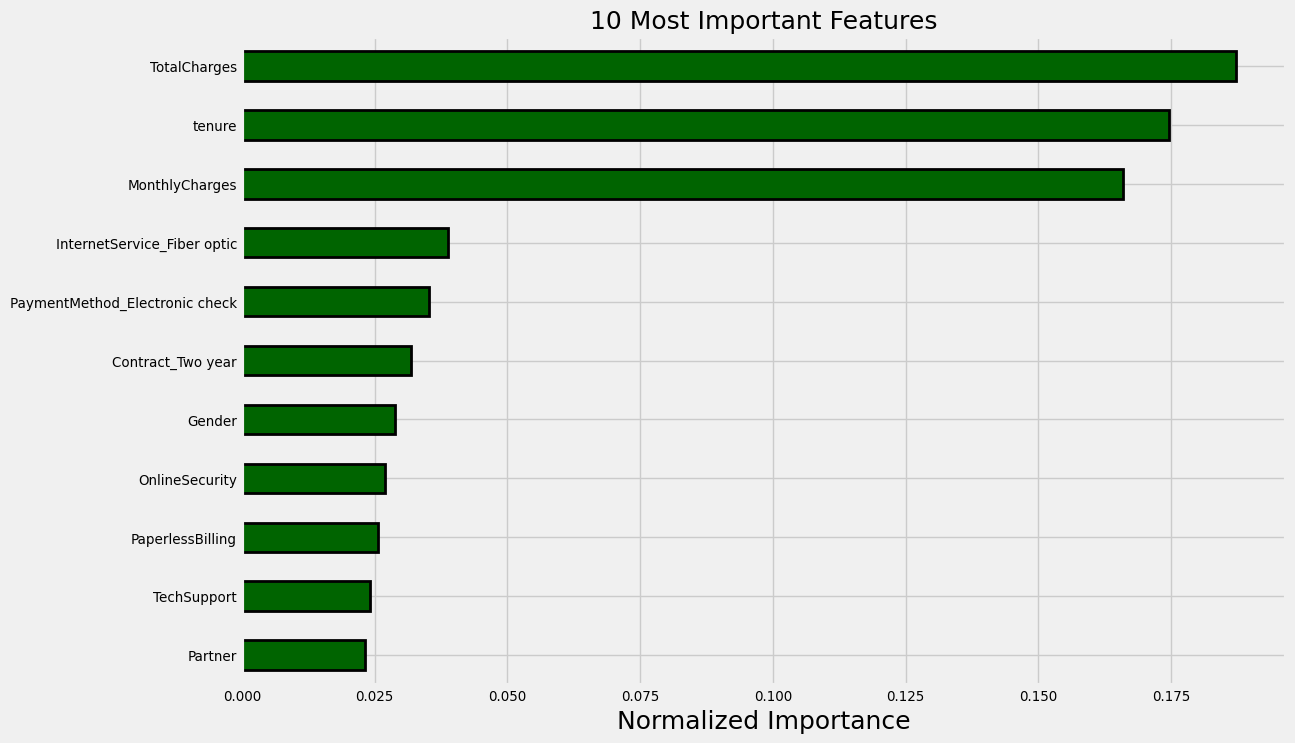

In [50]:
norm_fi = plot_feature_importances(feature_importances)

We have three more important features(`TotalCharges, tenure, MonthlyCharges`). However, feature importances don't tell us which direction of the feature is important (for example, we can't use these to tell whether more or less education leads to more severe poverty) they only tell us which features the model considered relevant. 

In [60]:
def kde_target(df, variable):
    """Plots the distribution of `variable` in `df` colored by the `Target` column"""
    
    colors = {1: 'red', 0: 'green'}

    plt.figure(figsize = (8, 8))
    
    df = df[df['Churn'].notnull()]
    
    for level in df['Churn'].unique():
        subset = df[df['Churn'] == level].copy()
        sns.kdeplot(subset[variable].dropna(), 
                    label = f'Churn: {level}', 
                    color = colors[int(subset['Churn'].unique())])
    plt.legend()
    
    plt.xlabel(variable); plt.ylabel('Density');
    plt.title('{} Distribution'.format(variable.capitalize()));

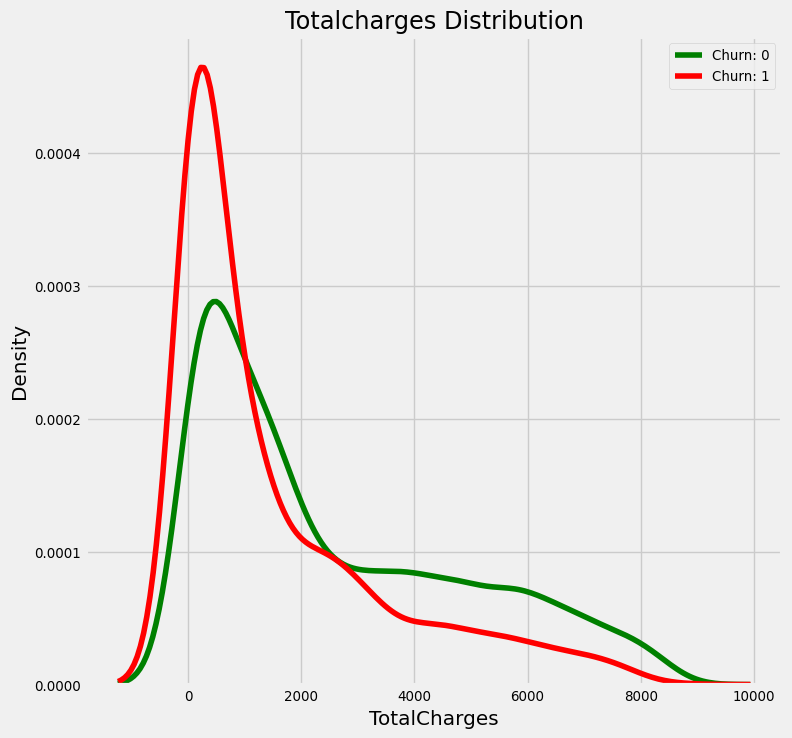

In [61]:
kde_target(final, 'TotalCharges')

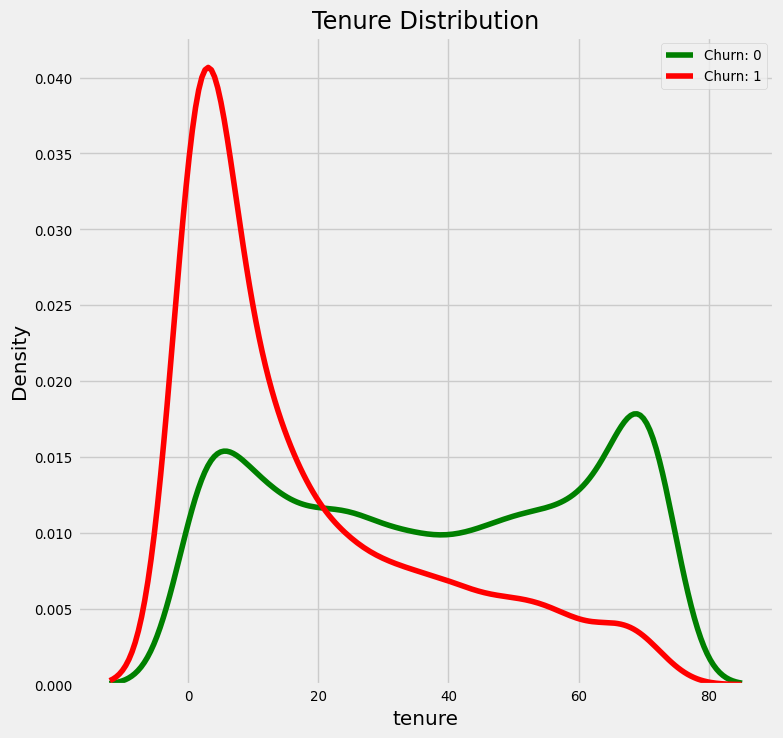

In [62]:
kde_target(final, 'tenure')

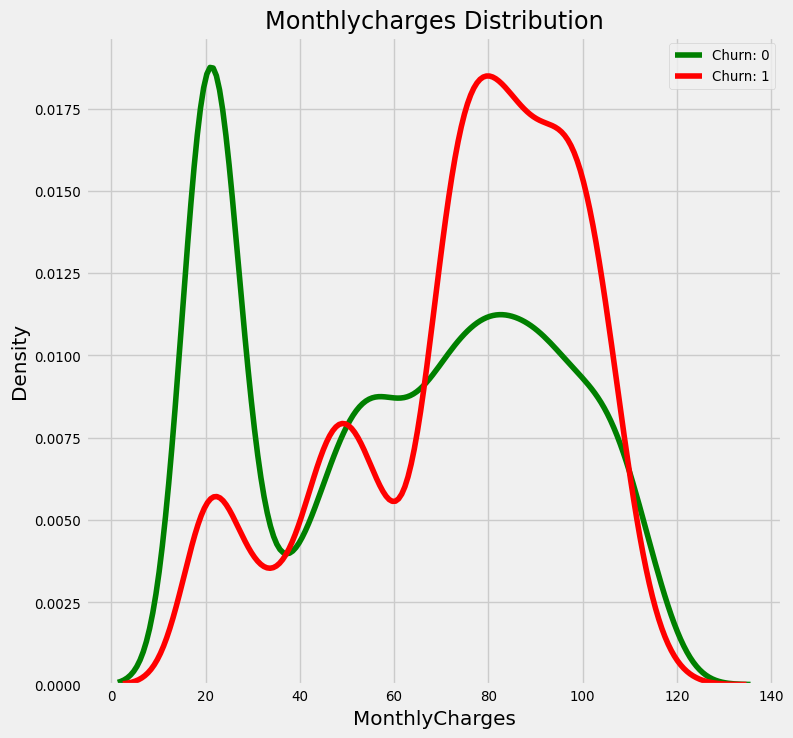

In [64]:
kde_target(final, 'MonthlyCharges')

# Model Selection

Now that we have a good set of features, it's time to get into the modeling. We already tried one basic model, the Random Forest Classifier which delivered a   F1 of 0.57. However, in machine learning, there is no way to know ahead of time which model will work best for a given dataset

In [65]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

In [68]:
import warnings 
from sklearn.exceptions import ConvergenceWarning

# Filter out warnings from models
warnings.filterwarnings('ignore', category = ConvergenceWarning)
warnings.filterwarnings('ignore', category = DeprecationWarning)
warnings.filterwarnings('ignore', category = UserWarning)

# Dataframe to hold results
model_results = pd.DataFrame(columns = ['model', 'cv_mean', 'cv_std'])

def cv_model(X_train, y_train, model, name, model_results=None):
    """Perform 10 fold cross validation of a model"""
    
    cv_scores = cross_val_score(model, X_train, y_train, cv = 10, scoring="f1", n_jobs = -1)
    print(f'10 Fold CV Score: {round(cv_scores.mean(), 5)} with std: {round(cv_scores.std(), 5)}')
    
    if model_results is not None:
        model_results = model_results.append(pd.DataFrame({'model': name, 
                                                           'cv_mean': cv_scores.mean(), 
                                                            'cv_std': cv_scores.std()},
                                                           index = [0]),
                                             ignore_index = True)

        return model_results

In [69]:
model_results = cv_model(X_train, y_train, SVC(), 
                         'SVC', model_results)

10 Fold CV Score: 0.57458 with std: 0.0351


In [70]:
model_results = cv_model(X_train, y_train, XGBClassifier(random_state=42), 
                         'XGB', model_results)

10 Fold CV Score: 0.55844 with std: 0.03265


In [71]:
model_results = cv_model(X_train, y_train, AdaBoostClassifier(random_state=42), 
                         'ADA', model_results)

10 Fold CV Score: 0.59195 with std: 0.0307


In [73]:
for n in [5, 10, 20]:
    print(f'\nKNN with {n} neighbors\n')
    model_results = cv_model(X_train, y_train, 
                             KNeighborsClassifier(n_neighbors = n),
                             f'knn-{n}', model_results)


KNN with 5 neighbors

10 Fold CV Score: 0.54904 with std: 0.03339

KNN with 10 neighbors

10 Fold CV Score: 0.54983 with std: 0.02497

KNN with 20 neighbors

10 Fold CV Score: 0.57696 with std: 0.03867


## Comparing Model Performance

With the modeling results in a dataframe, we can plot them to see which model does the best.

In [74]:
model_results = cv_model(X_train, y_train,
                          RandomForestClassifier(100, random_state=10),
                              'RF', model_results)

10 Fold CV Score: 0.56922 with std: 0.03369


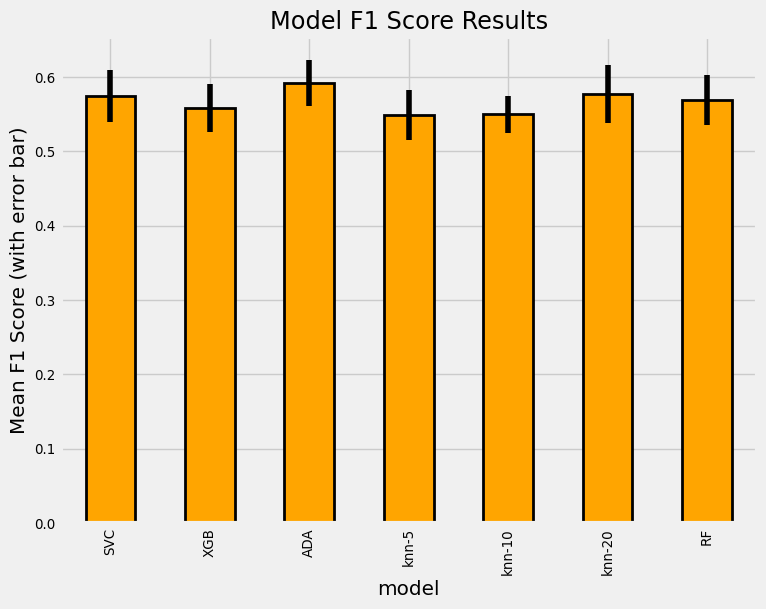

In [75]:
model_results.set_index('model', inplace = True)
model_results['cv_mean'].plot.bar(color = 'orange', figsize = (8, 6),
                                  yerr = list(model_results['cv_std']),
                                  edgecolor = 'k', linewidth = 2)
plt.title('Model F1 Score Results');
plt.ylabel('Mean F1 Score (with error bar)');
model_results.reset_index(inplace = True)

The algorithm that improved performance is `AdaBoostClassifier` with F1 score `0.59`

# Model Optimization

Model optimization is the process of extracting the best performance from a machine learning model by tuning the hyperparameters through cross-validation. 

In [77]:
parameters = {
    'n_estimators': range(10, 500),
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

In [78]:
from sklearn.model_selection import RandomizedSearchCV

ada = AdaBoostClassifier(random_state=42)
ada_search = RandomizedSearchCV(ada, parameters, n_iter=100, cv=10, scoring='f1', n_jobs=-1)
ada_search.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=AdaBoostClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 1.0],
                                        'n_estimators': range(10, 500)},
                   scoring='f1')

In [80]:
best_ada = ada_search.best_estimator_

In [81]:
ada_search.best_score_

0.5957695147486982

In [87]:
y_pred = best_ada.predict(X_test)

In [82]:
model_results = cv_model(X_train, y_train,
                         best_ada,
                              'Bada', model_results)

10 Fold CV Score: 0.59577 with std: 0.03314


In [84]:
feature_importances_ada = pd.DataFrame({'feature': features, 'importance': best_ada.feature_importances_})
feature_importances_ada.head()

,feature,importance
0,SeniorCitizen,0.016771
1,tenure,0.140461
2,MonthlyCharges,0.249476
3,TotalCharges,0.268344
4,Gender,0.000000


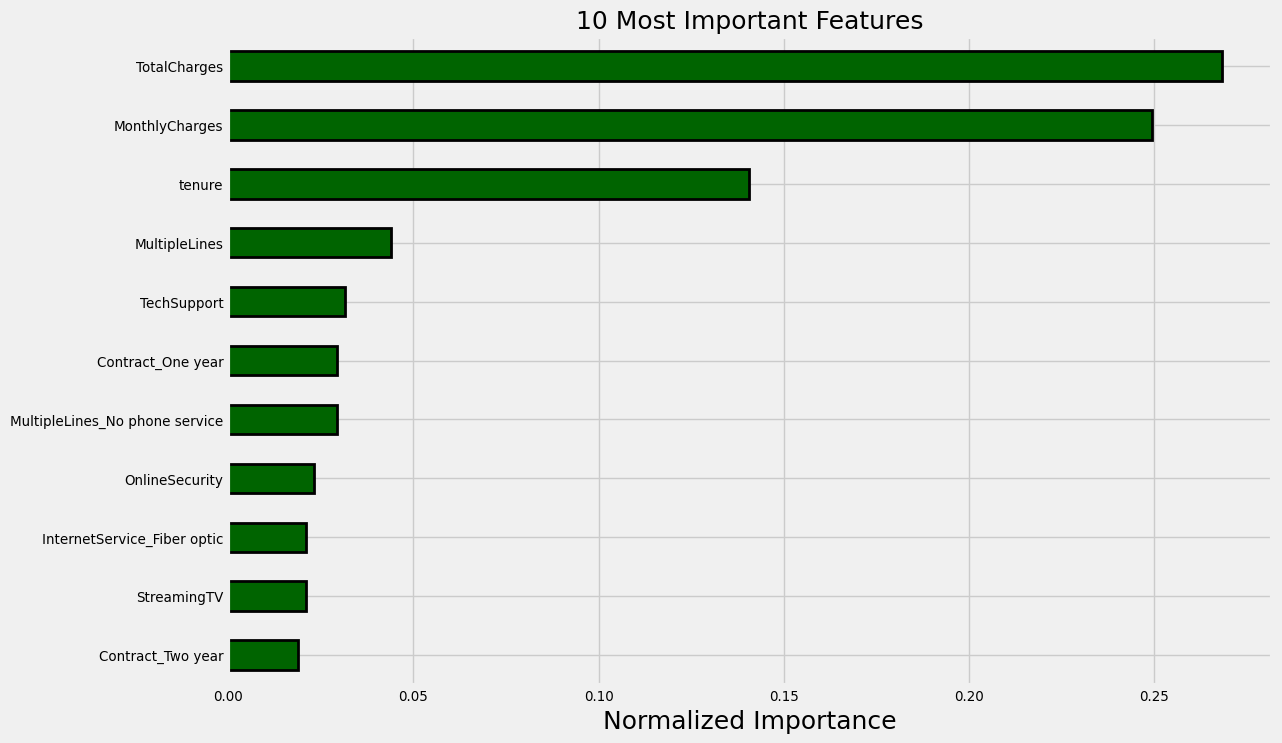

In [85]:
norm_ada = plot_feature_importances(feature_importances_ada)

The performance of our model has improved slightly( `60%`). At this point, to improve our performance, we can continue with the optimization, try more feature engineering, stack or ensemble additional models, or look at more experimental methods such as dimension reduction or oversampling. However, the scores we are getting are fairly good and I'm going to move on to a crucial part of machine learning: investigating the predictions to see where our model is wrong. 

# Investigate Predictions

In [91]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 11)
    plt.xlabel('Predicted label', size = 11)

Confusion matrix, without normalization
[[1398  151]
 [ 278  283]]


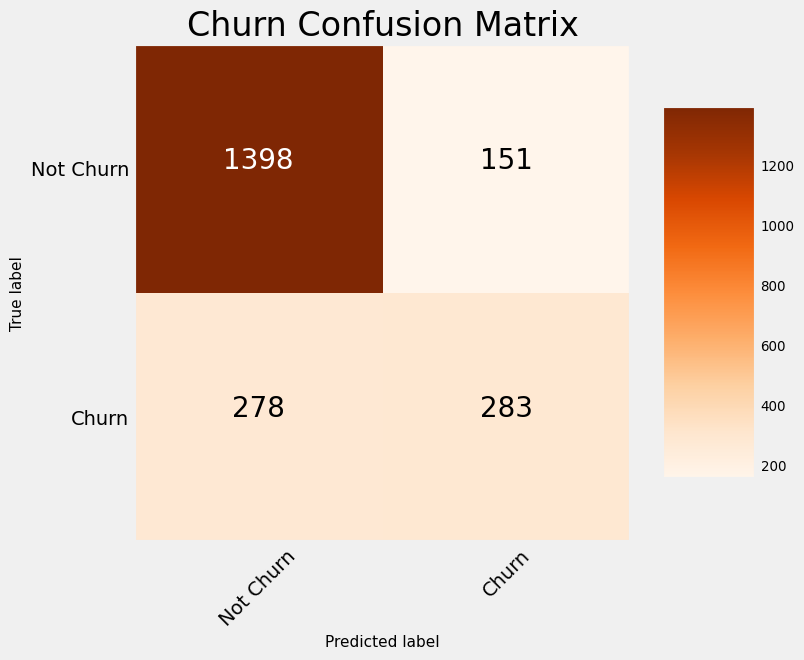

In [94]:
cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cm, classes = ['Not Churn', 'Churn'],
                      title = 'Churn Confusion Matrix')

Normalized confusion matrix
[[0.90251775 0.09748225]
 [0.49554367 0.50445633]]


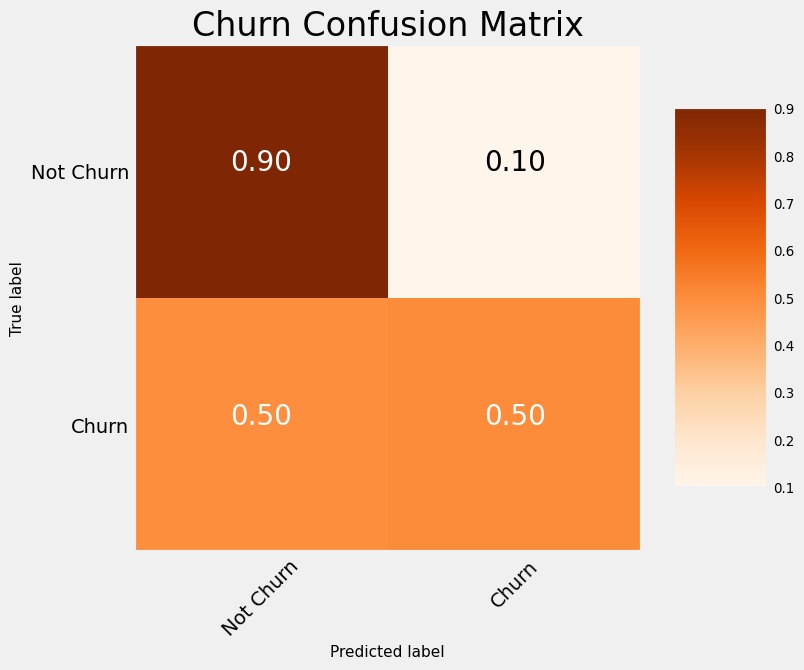

In [96]:
plot_confusion_matrix(cm, classes = ['Not Churn','Churn'],
                      title = 'Churn Confusion Matrix', normalize = True)

Now we can see that our model really does not do that well for  `Churn(1)` class. It only correctly identifies 5O% of the `Churn(1)` , classifying more of them as `Not Churn(0)`. Overall, these results show that imbalanced classification problems with relatively few observations are very difficult. There are some methods we can take to try and counter this such as oversampling or training multiple models on different sections of the data, but at the end of the day, the most effective method may be to __gather more data__. 